In [12]:
import numpy as np
import pandas as pd
import os

"""
This will load a csv file and return a pandas dataframe
@input: filepath:: string :: filepath of csv file
@input: names:: list :: column names list 
"""
def load_csv(filepath, names=None):
    filepath =  os.path.abspath(filepath)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, header=None, names=names, encoding='utf-8')
        return df
    
    return None

filepath = "data/nips.csv"
df = load_csv(filepath)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5802,5803,5804,5805,5806,5807,5808,5809,5810,5811
0,NaN,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
1,abalone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abbeel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abbreviate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = df.iloc[:, 1:]
df.head()

,1,2,3,4,5,6,7,8,9,10,...,5802,5803,5804,5805,5806,5807,5808,5809,5810,5811
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# While the implementation in sklearn is good,
# the scipy version can produce the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(df, 'ward')

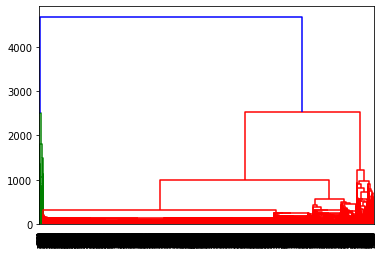

In [18]:
# Draw the dendrogram
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
dendrogram(Z)
plt.show()